# WeatherPy
----

### Analysis
* Weather becomes significantly warmer as one approaches the equator. There appears more of these hot cities in the northern hemisphere, this may be due to the tilt of the earth and climate derived from constant and direct sunlight.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. Between 0 and 50 Latitude there is a cluster of cities with lower wind speed, this could have something to do with distance from the ocean or some other factor as cities are founded where people need to live.
* Humidity does not seem to correlate strongly with distance to equator, it may have something to do with distance to the ocean, or other geographic factors.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
api_key = "your key here"
from citipy import citipy
output_data_file = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)
#dont forget to : pip install citipy
#mac users may need to: pip install pyopenssl ndg-httpsclient pyasn1
#otherwise api calls may refuse connection at some point

## Generate Cities List

In [2]:
lat_lngs = []
cities = []
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
i = 1
citylen = len(cities)
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
for city in cities:
    if i % 60 == 0:
        print("api mandated rest (key will get banned otherwise)")
        time.sleep(60)
    print(f"record {i} of {citylen}, city: {city}")
    target_url = ('http://api.openweathermap.org/data/2.5/weather?q='
                  '{0}&appid={1}').format(city, api_key)
    weather_data = requests.get(target_url).json()  
    try:
        city_name.append(weather_data['name'])
        cloudiness.append(weather_data['clouds']['all'])
        country.append(weather_data['sys']['country'])
        date.append(weather_data['dt'])
        humidity.append(weather_data['main']['humidity'])
        lat.append(weather_data["coord"]["lon"]) 
        lng.append(weather_data['coord']['lon'])
        max_temp.append(weather_data['main']['temp_max'])
        wind_speed.append(weather_data['wind']['speed'])
    except:
        try:
            print(f"record {i} no city with that name, next record.")
        except:
            print(f"record {i} no city with that name, next record.")
    i = i + 1
    # if you don't want to wait 60 seconds you can use the below
    #time.sleep(1)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv("weather.csv", encoding='utf-8')
weather_data.count()

In [13]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ilulissat,75,GL,1552575000,65,-51.10,-51.10,258.150,3.10
1,Tezu,88,IN,1552578871,88,96.16,96.16,287.796,0.76
2,Nome,40,US,1552578830,56,-94.42,-94.42,296.480,3.10
3,Benguela,8,AO,1552578873,88,13.40,13.40,302.396,4.01
4,Busselton,0,AU,1552578745,42,115.35,115.35,290.370,5.26


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

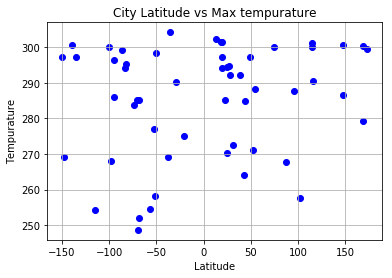

In [15]:
x_axis = weather_data["Lat"]
max_temps = weather_data["Max Temp"]

plt.title("City Latitude vs Max tempurature")
plt.xlabel("Latitude")
plt.ylabel("Tempurature")
plt.grid(True)
plt.scatter(x_axis, max_temps, marker="o", color="blue")
plt.savefig('lat_v_temp.png')
plt.show()

#### Latitude vs. Humidity Plot

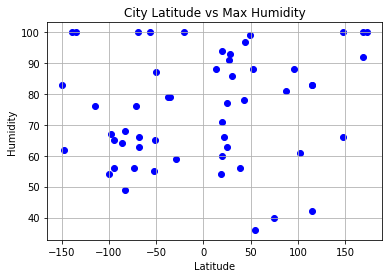

In [16]:
x_axis = weather_data["Lat"]
max_temps = weather_data["Humidity"]

plt.title("City Latitude vs Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.scatter(x_axis, max_temps, marker="o", color="blue")
plt.savefig('lat_v_humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

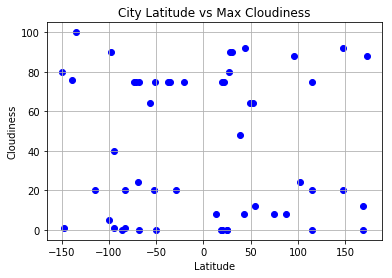

In [17]:
x_axis = weather_data["Lat"]
max_temps = weather_data["Cloudiness"]

plt.title("City Latitude vs Max Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.scatter(x_axis, max_temps, marker="o", color="blue")
plt.savefig('lat_v_cloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

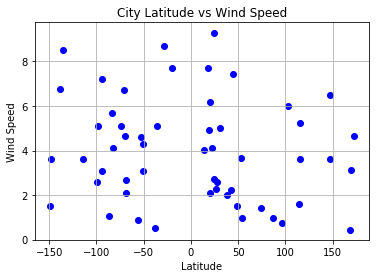

In [18]:
x_axis = weather_data["Lat"]
max_temps = weather_data["Wind Speed"]

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.scatter(x_axis, max_temps, marker = "o", color="blue")
plt.savefig('lat_v_wind.png')
plt.show()